In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Exercise 3

Question: Analytically solve the problem by using Hough transform: In 2D space
you are given four points (0, 0), (1, 1), (1, 0), (2, 2). Define the equations of the lines that run through at least two of these points.

y = mx + c      <=>    c = -xm + y

0 = m*0 + c     <=>    c = 0

1 = m*1 + c     <=>    c = -m + 1

0 = m*1 + c     <=>    c = -m

2 = m*2 + c     <=>    c = -2m + 2

line intersections in (m, c) are (0, 0), (1, 0), (2, -2)
and represent lines y = 0, y = x, y = 2x - 2
Two lines don't intersect => k = inf


### a
x cos(ϑ) + y sin(ϑ) = ρ

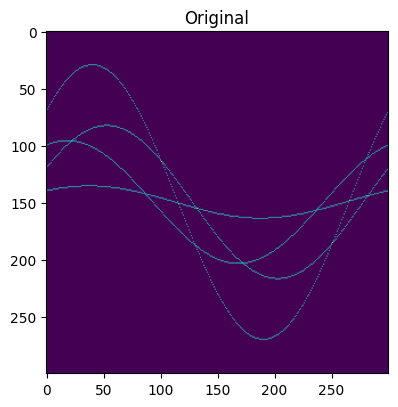

In [26]:
def sinuoids(x, y, arr, fiResolution, roResolution):
    for i in range(fiResolution):
        fi = i * 2 * np.pi / fiResolution - np.pi
        ro = x * np.cos(fi) + y * np.sin(fi)
        arr[i + int(ro + roResolution/2) * fiResolution] += 1
    return arr

fiResolution = 300
roResolution = 300
accumulator = np.zeros(fiResolution * roResolution)
accumulator = sinuoids(10, 10, accumulator, fiResolution, roResolution)
accumulator = sinuoids(30, 60, accumulator, fiResolution, roResolution)
accumulator = sinuoids(50, 20, accumulator, fiResolution, roResolution)
accumulator = sinuoids(80, 90, accumulator, fiResolution, roResolution)

f = plt.figure(figsize=(15, 8))
f.add_subplot(1, 3, 1)
plt.imshow(np.reshape(accumulator, (roResolution,fiResolution)))
plt.title("Original")
plt.show()

### b

141.4213562373095


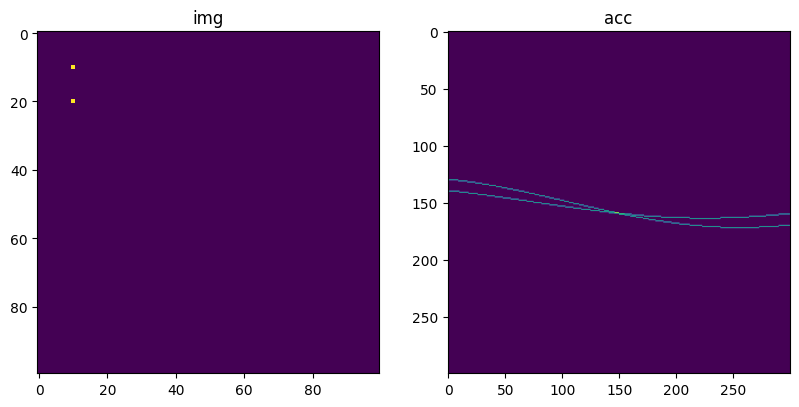

In [48]:
# TODO: size is wrong
def accumulate(arr, x, y, width, height, fiResolution, roResolution):
    for i in range(fiResolution):
        fi = i * np.pi / fiResolution - np.pi/2
        ro = x * np.cos(fi) + y * np.sin(fi)
        arr[i + int(ro + roResolution/2) * fiResolution] += 1
    return arr

def hough_find_lines(img, fiResolution, roResolution, threshold):
    accumulator = np.zeros(fiResolution * roResolution)
    width = np.pi
    height = np.sqrt(np.sum(np.array(temp.shape)**2))
    for y, row in enumerate(img):
        for x, pixel in enumerate(row):
            if pixel != 0:
                accumulator = accumulate(accumulator, x, y, width, height, fiResolution, roResolution)            
    return accumulator


temp = np.zeros((100,100))
temp[10,10] = 1
temp[20,10] = 1
fiResolution = 300
roResolution = 300
acc = hough_find_lines(temp, fiResolution, roResolution, 123)
print(np.sqrt(100 * 100 + 100 * 100))

f = plt.figure(figsize=(15, 8))
f.add_subplot(1, 3, 1)
plt.imshow(temp)
plt.title("img")
f.add_subplot(1, 3, 2)
plt.imshow(np.reshape(acc, (roResolution,fiResolution)))
plt.title("acc")
plt.show()